# Simulation Overview

iRobot is a company (started by MIT alumni and faculty) that sells the Roomba vacuuming robot (watch one of the product videos to see these robots in action). Roomba robots move around the floor, cleaning the area they pass over.

In this problem set, you will code a simulation to compare how much time a group of Roomba-like robots will take to clean the floor of a room using two different strategies.

The following simplified model of a single robot moving in a square 5x5 room should give you some intuition about the system we are simulating.

The robot starts out at some random position in the room, and with a random direction of motion. The illustrations below show the robot's position (indicated by a black dot) as well as its direction (indicated by the direction of the red arrowhead).

<table>
<tbody>
<tr>
<td width="33%" valign="top"><a href="//prod-edxapp.edx-cdn.org/assets/courseware/v1/a9599c894201ed96d8cd6d1afd778a62/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen1.png" target="_blank"> <img src="//prod-edxapp.edx-cdn.org/assets/courseware/v1/a9599c894201ed96d8cd6d1afd778a62/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen1.png" title="Problem Set 7 - Example Screen 1" height="190" width="190" alt="" class="alignnone size-full wp-image-821"> </a> <br> <strong>Time <em>t</em> = 0</strong>
<p>The robot starts at the position (2.1, 2.2) with an angle of 205 degrees (measured clockwise from "north"). The tile that it is on is now clean.</p>
</td>
<td width="33%" valign="top"><a href="//prod-edxapp.edx-cdn.org/assets/courseware/v1/178f80c0f5724973720aba89faa741a3/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen2.png" target="_blank"> <img src="//prod-edxapp.edx-cdn.org/assets/courseware/v1/178f80c0f5724973720aba89faa741a3/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen2.png" title="Problem Set 7 - Example Screen 2" height="190" width="190" alt="" class="alignnone size-full wp-image-822"> </a> <br> <strong><em>t</em> = 1</strong>
<p>The robot has moved 1 unit in the direction it was facing, to the position (1.7, 1.3), cleaning another tile.</p>
</td>
<td width="33%" valign="top"><a href="/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_screen3.png" target="_blank"> <img src="//prod-edxapp.edx-cdn.org/assets/courseware/v1/debc0f78a5d1191088c6972e39a4b265/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen3.png" title="Problem Set 7 - Example Screen 3" height="190" width="190" alt="" class="alignnone size-full wp-image-823"> </a> <br> <strong><em>t</em> = 2</strong>
<p>The robot has moved 1 unit in the same direction (205 degrees from north), to the position (1.2, 0.4), cleaning another tile.</p>
</td>
</tr>
<tr>
<td width="33%" valign="top"><a href="//prod-edxapp.edx-cdn.org/assets/courseware/v1/300d6494c0f7f83c84efafbc44484973/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen4.png" target="_blank"> <img src="//prod-edxapp.edx-cdn.org/assets/courseware/v1/300d6494c0f7f83c84efafbc44484973/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen4.png" title="Problem Set 7 - Example Screen 4" height="190" width="190" alt="" class="alignnone size-full wp-image-824"> </a> <br> <strong><em>t</em> = 3</strong>
<p>The robot could not have moved another unit in the same direction without hitting the wall, so instead it turns to face in a new, random direction, 287 degrees.</p>
</td>
<td width="33%" valign="top"><a href="//prod-edxapp.edx-cdn.org/assets/courseware/v1/1a51168c1262621d2a46fbd59f26845b/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen5.png" target="_blank"> <img src="//prod-edxapp.edx-cdn.org/assets/courseware/v1/1a51168c1262621d2a46fbd59f26845b/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_screen5.png" title="Problem Set 7 - Example Screen 5" height="190" width="190" alt="" class="alignnone size-full wp-image-825"> </a> <br> <strong><em>t</em> = 4</strong>
<p>The robot moves along its new direction to the position (0.3, 0.7), cleaning another tile.</p>
</td>
<td width="33%">
<p></p>
</td>
</tr>
</tbody>
</table>

<ul>
<li><strong>Multiple robots</strong>
<p>In general, there are <em>N</em> &gt; 0 robots in the room, where <em>N</em> is given. For simplicity, assume that robots are points and can pass through each other or occupy the same point without interfering.</p>
</li>
<li><strong>The room</strong>
<p>The room is rectangular with some integer width <em>w</em> and height <em>h</em>, which are given. Initially the entire floor is dirty. A robot cannot pass through the walls of the room. A robot may not move to a point outside the room.</p>
</li>
<li><strong>Tiles</strong>
<p>You will need to keep track of which parts of the floor have been cleaned by the robot(s). We will divide the area of the room into 1x1 tiles (there will be <em>w * h</em> such tiles). When a robot's location is anywhere in a tile, we will consider the entire tile to be cleaned (as in the pictures above). By convention, we will refer to the tiles using ordered pairs of integers: (0, 0), (0, 1), ..., (0, <em>h</em>-1), (1, 0), (1, 1), ..., (<em>w</em>-1, <em>h</em>-1).</p>
</li>
<li><strong>Robot motion rules</strong>
<ul>
<li>
<p>Each robot has a position inside the room. We'll represent the position using coordinates (<em>x</em>, <em>y</em>) which are floats satisfying 0 ≤ <em>x</em> &lt; <em>w</em> and 0 ≤ <em>y</em> &lt; <em>h</em>. In our program we'll use instances of the <code>Position</code> class to store these coordinates.</p>
</li>
<li>
<p>A robot has a direction of motion. We'll represent the direction using an integer <em>d</em> satisfying 0 ≤ <em>d</em> &lt; 360, which gives an angle in degrees.</p>
</li>
<li>
<p>All robots move at the same speed <em>s</em>, a float, which is given and is constant throughout the simulation. Every time-step, a robot moves in its direction of motion by <em>s</em> units.</p>
</li>
<li>
<p>If a robot detects that it will hit the wall within the time-step, that time step is <strong>instead</strong> spent picking a new direction at random. The robot will attempt to move in that direction on the next time step, until it reaches another wall.</p>
</li>
</ul>
</li>
<li><strong>Termination</strong>
<p>The simulation ends when a specified fraction of the tiles in the room have been cleaned.</p>
</li>
</ul>

<div class="vert vert-0" data-id="block-v1:MITx+6.00.2x+3T2017+type@html+block@2c782c4693e54818bf0a004531e7ed84">
    <div class="xblock xblock-student_view xblock-student_view-html xmodule_display xmodule_HtmlModule xblock-initialized" data-runtime-class="LmsRuntime" data-init="XBlockToXModuleShim" data-block-type="html" data-request-token="c857dcf6bcf711e7823f0aadd12eb5d0" data-runtime-version="1" data-usage-id="block-v1:MITx+6.00.2x+3T2017+type@html+block@2c782c4693e54818bf0a004531e7ed84" data-type="HTMLModule" data-course-id="course-v1:MITx+6.00.2x+3T2017">
  
  






<div id="edx-notes-wrapper-188778920801272714825215845142596004821" class="edx-notes-wrapper"><span class="edx-notes-focus-grabber" tabindex="-1"></span><div class="annotator-wrapper">
    <div class="edx-notes-wrapper-content"><h2>Introduction</h2>
<p>In this problem set you will practice designing a simulation and implementing a program that uses classes.</p>
<p>As with previous problem sets, please don't be discouraged by the apparent length of this assignment. There is quite a bit to read and understand, but most of the problems do not involve writing much code.</p>
<h2>Getting Started</h2>
<p><strong>Download and save</strong></p>
<p><a href="//prod-edxapp.edx-cdn.org/assets/courseware/v1/5ac75dd1b33a9b97132c0b1b24e65324/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/pset2.zip" target="_blank">pset2.zip</a>: A zip file of all the files you need, including:</p>
<ul>
<li>
<p><code>ps2.py</code>, a skeleton of the solution.</p>
</li>
<li>
<p><code>ps2_visualize.py</code>, code to help you visualize the robot's movement (an optional - but cool! - part of this problem set).</p>
</li>
<li>
<p><code>ps2_verify_movement35.pyc</code>, precompiled module for Python 3.5 that assists with the visualization code. In <span style="font-family: 'courier new', courier;">ps2.py</span> you will uncomment this out if you have Python 3.5.</p>
</li>
<li>
<p><code>ps2_verify_movement36.pyc</code>, precompiled module for Python 3.6 that assists with the visualization code. In&nbsp;<span style="font-family: 'courier new', courier;">ps2.py</span>&nbsp;you will uncomment this out if you have Python 3.6.</p>
</li>
</ul>


</div>

  </div>

# Problem 1: RectangularRoom Class

You will need to design two classes to keep track of which parts of the room have been cleaned as well as the position and direction of each robot.

In ps2.py, we've provided skeletons for the following two classes, which you will fill in in Problem 1:

RectangularRoom: Represents the space to be cleaned and keeps track of which tiles have been cleaned.
Position: We've also provided a complete implementation of this class. It stores the x- and y-coordinates of a robot in a room.
Read ps2.py carefully before starting, so that you understand the provided code and its capabilities.

Problem 1

In this problem you will implement the RectangularRoom class. For this class, decide what fields you will use and decide how the following operations are to be performed:

Initializing the object
Marking an appropriate tile as cleaned when a robot moves to a given position (casting floats to ints - and/or the function math.floor - may be useful to you here)
* Determining if a given tile has been cleaned
* Determining how many tiles there are in the room
* Determining how many cleaned tiles there are in the room
* Getting a random position in the room
* Determining if a given position is in the room
* Complete the RectangularRoom class by implementing its methods in ps2.py.

Although this problem has many parts, it should not take long once you have chosen how you wish to represent your data. For reasonable representations, a majority of the methods will require only a couple of lines of code.)

Hint: During debugging, you might want to use random.seed(0) so that your results are reproducible.

Enter your code for RectangularRoom below.

In [4]:
import random

# === Provided class Position
class Position(object):
    """
    A Position represents a location in a two-dimensional room.
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.getX(), self.getY()
        angle = float(angle)
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        return Position(new_x, new_y)

    def __str__(self):
        return "(%0.2f, %0.2f)" % (self.x, self.y)


# === Problem 1
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. At any
    particular time, each of these tiles is either clean or dirty.
    """
    def __init__(self, width, height):
        """
        Initializes a rectangular room with the specified width and height.

        Initially, no tiles in the room have been cleaned.

        width: an integer > 0
        height: an integer > 0
        cleanPos: list of tuples representing the position that been cleaned
        """

        self.width = width
        self.height = height
        self.cleanPos = []

    def cleanTileAtPosition(self, pos):
        """
        Mark the tile under the position POS as cleaned.

        Assumes that POS represents a valid position inside this room.

        pos: a Position
        """
        
        x, y = int(pos.getX()), int(pos.getY())
        if (x,y) not in self.cleanPos:
            self.cleanPos.append((x,y))

    def isTileCleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        returns: True if (m, n) is cleaned, False otherwise
        """
        if (m,n) in self.cleanPos:
            return True
        else:
            return False

    def getNumTiles(self):
        """
        Return the total number of tiles in the room.

        returns: an integer
        """
        return self.width * self.height

    def getNumCleanedTiles(self):
        """
        Return the total number of clean tiles in the room.

        returns: an integer
        """
        return len(self.cleanPos)

    def getRandomPosition(self):
        """
        Return a random position inside the room.

        returns: a Position object.
        """
        x = random.randint(0, self.width - 1)
        y = random.randint(0, self.height - 1)
        return Position(x,y)

    def isPositionInRoom(self, pos):
        """
        Return True if pos is inside the room.

        pos: a Position object.
        returns: True if pos is in the room, False otherwise.
        """
        x, y = pos.getX(), pos.getY()
        if x < self.width and x >= 0 and y < self.height and y >= 0:
            return True

        return False

In [5]:
#debug problem 1
RoomA = RectangularRoom(10,7)
RoomA.width

10

In [6]:
RoomA.cleanTileAtPosition(Position(2.3,3.4))

In [7]:
RoomA.isTileCleaned(2,3)

True

In [8]:
RoomA.isPositionInRoom(Position(12,12))

False

In [9]:
RoomA.isPositionInRoom(Position(10,7))

False

In [10]:
random.seed(0)
RoomA.getRandomPosition()

In [11]:
RoomA.getRandomPosition()

In [12]:
RoomA.getNumCleanedTiles()

1

# Problem 2: Robot Class

In ps2.py we provided you with the Robot class, which stores the position and direction of a robot. For this class, decide what fields you will use and decide how the following operations are to be performed:

* Initializing the object
* Accessing the robot's position
* Accessing the robot's direction
* Setting the robot's position
* Setting the robot's direction

Complete the Robot class by implementing its methods in ps2.py.

Note: When a Robot is initialized, it should clean the first tile it is initialized on. Generally the model these Robots will follow is that after a robot lands on a given tile, we will mark the entire tile as clean. This might not make sense if you're thinking about really large tiles, but as we make the size of the tiles smaller and smaller, this does actually become a pretty good approximation.

Although this problem has many parts, it should not take long once you have chosen how you wish to represent your data. For reasonable representations, a majority of the methods will require only a couple of lines of code.)

Note: The Robot class is an abstract class, which means that we will never make an instance of it. Read up on the Python docs on abstract classes at this link and if you want more examples on abstract classes, follow this link.

In the final implementation of Robot, not all methods will be implemented. Not to worry -- its subclass(es) will implement the method updatePositionAndClean()

Enter your code for classes RectangularRoom (from the previous problem) and Robot below.

In [13]:
import random

# === Problem 2
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.angle = random.randrange(0,360)
        self.room = room
        self.pos = room.getRandomPosition()
        self.speed = speed
        self.room.cleanTileAtPosition(self.pos)

    def getRobotPosition(self):
        """
        Return the position of the robot.

        returns: a Position object giving the robot's position.
        """
        return self.pos

    def getRobotDirection(self):
        """
        Return the direction of the robot.

        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.angle

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.

        position: a Position object.
        """
        if self.room.isPositionInRoom(position):
            self.pos = position
        self.getRobotPosition()

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.

        direction: integer representing an angle in degrees
        """
        self.angle = direction

    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        raise NotImplementedError

# Problem 3: StandardRobot Class

Each robot must also have some code that tells it how to move about a room, which will go in a method called updatePositionAndClean.

Ordinarily we would consider putting all the robot's methods in a single class. However, later in this problem set we'll consider robots with alternate movement strategies, to be implemented as different classes with the same interface. These classes will have a different implementation of updatePositionAndClean but are for the most part the same as the original robots. Therefore, we'd like to use inheritance to reduce the amount of duplicated code.

We have already refactored the robot code for you into two classes: the Robot class you completed in Problem 2 (which contains general robot code), and a StandardRobot class that inherits from it (which contains its own movement strategy).

Complete the updatePositionAndClean method of StandardRobot to simulate the motion of the robot after a single time-step (as described on the Simulation Overview page).

class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current direction; when
    it hits a wall, it chooses a new direction randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
We have provided the getNewPosition method of Position, which you may find helpful:

class Position(object):

    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: number representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
Note: You can pass in an integer or a float for the angle parameter.

Before moving on to Problem 4, check that your implementation of StandardRobot works by uncommenting the following line under your implementation of StandardRobot. Make sure that as your robot moves around the room, the tiles it traverses switch colors from gray to white. It should take about a minute for it to clean all the tiles.

testRobotMovement(StandardRobot, RectangularRoom)

Enter your code for classes Robot (from the previous problem) and StandardRobot below.

In [14]:
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current direction; when
    it hits a wall, it chooses a new direction randomly.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        tmp = self.pos.getNewPosition(self.angle, self.speed)
        while not self.room.isPositionInRoom(tmp):
            self.angle = random.randrange(0,360)
            tmp = self.pos.getNewPosition(self.angle, self.speed)

        self.pos = tmp
        self.room.cleanTileAtPosition(self.pos)
        self.angle = random.randrange(0,360)
        

# Problem 4: Running the Simulation

In this problem you will write code that runs a complete robot simulation.

Recall that in each trial, the objective is to determine how many time-steps are on average needed before a specified fraction of the room has been cleaned. Implement the following function:

def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.
    """
The first six parameters should be self-explanatory. For the time being, you should pass in StandardRobot for the robot_type parameter, like so:

avg = runSimulation(10, 1.0, 15, 20, 0.8, 30, StandardRobot)
Then, in runSimulation you should use robot_type(...) instead of StandardRobot(...) whenever you wish to instantiate a robot. (This will allow us to easily adapt the simulation to run with different robot implementations, which you'll encounter in Problem 6.)

Feel free to write whatever helper functions you wish.

We have provided the getNewPosition method of Position, which you may find helpful:

class Position(object):

    def getNewPosition(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: integer representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
For your reference, here are some approximate room cleaning times. These times are with a robot speed of 1.0.

* One robot takes around 150 clock ticks to completely clean a 5x5 room.

* One robot takes around 190 clock ticks to clean 75% of a 10x10 room.

* One robot takes around 310 clock ticks to clean 90% of a 10x10 room.

* One robot takes around 3322 clock ticks to completely clean a 20x20 room.

* Three robots take around 1105 clock ticks to completely clean a 20x20 room.

(These are only intended as guidelines. Depending on the exact details of your implementation, you may get times slightly different from ours.)

You should also check your simulation's output for speeds other than 1.0. One way to do this is to take the above test cases, change the speeds, and make sure the results are sensible.

For further testing, see the next page in this problem set about the optional way to use visualization methods. Visualization will help you see what's going on in the simulation and may assist you in debugging your code.

Enter your code for the definition of runSimulation below.

In [24]:
def runSimulation(num_robots, speed, width, height, min_coverage, num_trials,
                  robot_type):
    """
    Runs NUM_TRIALS trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction MIN_COVERAGE of the room.

    The simulation is run with NUM_ROBOTS robots of type ROBOT_TYPE, each with
    speed SPEED, in a room of dimensions WIDTH x HEIGHT.

    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    width: an int (width > 0)
    height: an int (height > 0)
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                RandomWalkRobot)
    """
    record = []
    for i in range(num_trials):
        time = 0

        room = RectangularRoom(width, height)

        robots = [robot_type(room, speed) for j in range(num_robots)]
        while (room.getNumCleanedTiles()/room.getNumTiles()) < min_coverage:
            time += 1
            for robot in robots:
                robot.updatePositionAndClean()
            if (room.getNumCleanedTiles()/room.getNumTiles()) >= min_coverage:
                record.append(time)
            else:
                continue

    return sum(record)/len(record)

# Problem 5: RandomWalkRobot Class

iRobot is testing out a new robot design. The proposed new robots differ in that they change direction randomly after every time step, rather than just when they run into walls. You have been asked to design a simulation to determine what effect, if any, this change has on room cleaning times.

Write a new class RandomWalkRobot that inherits from Robot (like StandardRobot) but implements the new movement strategy. RandomWalkRobot should have the same interface as StandardRobot.

Test out your new class. Perform a single trial with the StandardRobot implementation and watch the visualization to make sure it is doing the right thing. Once you are satisfied, you can call runSimulation again, passing RandomWalkRobot instead of StandardRobot.

Enter your code for classes Robot and RandomWalkRobot below.

In [25]:
# Enter your code for Robot and RandomWalkRobot in this box
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times the robot has a particular position and direction in the room.
    The robot also has a fixed speed.

    Subclasses of Robot should provide movement strategies by implementing
    updatePositionAndClean(), which simulates a single time-step.
    """
    def __init__(self, room, speed):
        """
        Initializes a Robot with the given speed in the specified room. The
        robot initially has a random direction and a random position in the
        room. The robot cleans the tile it is on.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        """
        self.angle = random.randrange(0,360)
        self.room = room
        self.pos = room.getRandomPosition()
        self.speed = speed
        self.room.cleanTileAtPosition(self.pos)

    def getRobotPosition(self):
        """
        Return the position of the robot.

        returns: a Position object giving the robot's position.
        """
        return self.pos

    def getRobotDirection(self):
        """
        Return the direction of the robot.

        returns: an integer d giving the direction of the robot as an angle in
        degrees, 0 <= d < 360.
        """
        return self.angle

    def setRobotPosition(self, position):
        """
        Set the position of the robot to POSITION.

        position: a Position object.
        """
        if self.room.isPositionInRoom(position):
            self.pos = position
        self.getRobotPosition()

    def setRobotDirection(self, direction):
        """
        Set the direction of the robot to DIRECTION.

        direction: integer representing an angle in degrees
        """
        self.angle = direction

    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        # tmp = self.pos.getNewPosition(self.angle, self.speed)
        # while not self.room.isPositionInRoom(tmp):
        #     self.angle = random.randrange(0,360)
        #     tmp = self.pos.getNewPosition(self.angle, self.speed)
        #
        # self.pos = tmp
        # self.angle = random.randrange(0,360)
        raise NotImplementedError
        
class RandomWalkRobot(Robot):
    """
    A RandomWalkRobot is a robot with the "random walk" movement strategy: it
    chooses a new direction at random at the end of each time-step.
    """
    def updatePositionAndClean(self):
        """
        Simulate the passage of a single time-step.

        Move the robot to a new position and mark the tile it is on as having
        been cleaned.
        """
        tmp = self.pos.getNewPosition(self.angle, self.speed)
        while not self.room.isPositionInRoom(tmp):
            self.angle = random.randrange(0,360)
            tmp = self.pos.getNewPosition(self.angle, self.speed)

        self.pos = tmp
        self.angle = random.randrange(0,360)
        self.room.cleanTileAtPosition(self.pos)

Now, you'll use your simulation to answer some questions about the robots' performance.

In order to do this problem, you will be using a Python tool called PyLab. 

Below is an example of a plot. This plot does not use the same axes that your plots will use; it merely serves as an example of the types of images that the PyLab package produces.

 

Note to those who did the optional visualization: For problem 6, we make calls to runSimulation() to get simulation data and plot it. However, you don't want the visualization getting in the way. If you chose to do the visualization exercise, before you get started on problem 6 (and before you submit your code in submission boxes), make sure to comment the visualization code out of runSimulation(). There should be 3 lines to comment out. If you do not comment these lines, your code will take a REALLY long time to run!!

For the questions below, call the given function with the proper arguments to generate a plot using PyLab.

<img src = "https://prod-edxapp.edx-cdn.org/assets/courseware/v1/5e3b84f365c85ef9f5413b3d0d681c3c/asset-v1:MITx+6.00.2x+3T2017+type@asset+block/files_ps07_files_sampleplot-small.png">

In [26]:
import math
import pylab
def showPlot1(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print("Plotting", num_robots, "robots...")
        times1.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, StandardRobot))
        times2.append(runSimulation(num_robots, 1.0, 20, 20, 0.8, 20, RandomWalkRobot))
    pylab.plot(num_robot_range, times1)
    pylab.plot(num_robot_range, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()


def showPlot2(title, x_label, y_label):
    """
    What information does the plot produced by this function tell you?
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300//width
        print("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(runSimulation(2, 1.0, width, height, 0.8, 200, StandardRobot))
        times2.append(runSimulation(2, 1.0, width, height, 0.8, 200, RandomWalkRobot))
    pylab.plot(aspect_ratios, times1)
    pylab.plot(aspect_ratios, times2)
    pylab.title(title)
    pylab.legend(('StandardRobot', 'RandomWalkRobot'))
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    pylab.show()

Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


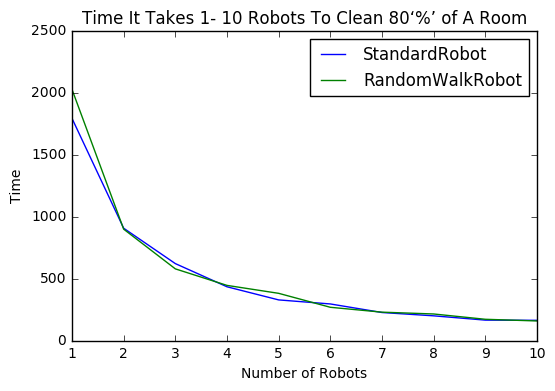

In [27]:
showPlot1("Time It Takes 1- 10 Robots To Clean 80‘%’ of A Room", "Number of Robots", "Time")

Plotting cleaning time for a room of width: 10 by height: 30
Plotting cleaning time for a room of width: 20 by height: 15
Plotting cleaning time for a room of width: 25 by height: 12
Plotting cleaning time for a room of width: 50 by height: 6


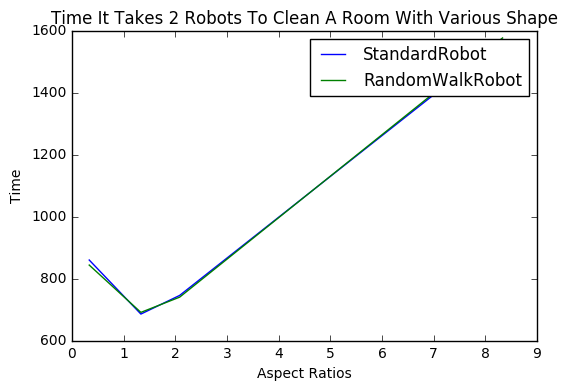

In [28]:
showPlot2("Time It Takes 2 Robots To Clean A Room With Various Shape", "Aspect Ratios", "Time")